<a href="https://colab.research.google.com/github/opherdonchin/Regression-by-group/blob/main/Regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I built this using the outline in this page: [Bayesian Linear Regression Using PyMC3](https://ostwalprasad.github.io/machine-learning/Bayesian-Linear-Regression-using-PyMC3.html)

In [1]:
!pip install pymc3
!pip install seaborn

In [11]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [3]:
url_impl = 'https://raw.githubusercontent.com/opherdonchin/Regression-by-group/main/implAndAfter_NoLandmarks.csv'
url_expl = 'https://raw.githubusercontent.com/opherdonchin/Regression-by-group/main/explAndAfter_NoLandmarks.csv'
impl_data = pd.read_csv(url_impl, sep=",", on_bad_lines='skip')
expl_data = pd.read_csv(url_expl, sep=",", on_bad_lines='skip')

In [4]:
print('Running on the PyMC3 v{}'.format(pm.__version__))


Running on the PyMC3 v3.11.4


In [7]:
basic_model =  pm.Model()
group_data = impl_data["Group"] == 1
x = impl_data.loc[group_data,"Implicit Eye"]
y = impl_data.loc[group_data, "Aftereffect"]
with basic_model as bm:

    #Priors
    beta = pm.Normal('beta', mu=0, sd=10, testval=0.0)
    sigma = pm.HalfNormal('sigma', sd=1, testval=1)

    # Deterministics
    mu = beta*x
    
    # Likelihood 
    Ylikelihood = pm.Normal('Ylikelihood', mu=mu, sd=sigma, observed=y)

In [8]:
 trace = pm.sample(draws=2000,model=bm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """Entry point for launching an IPython kernel.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 6 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful resul

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a8885ef50>,
      dtype=object)

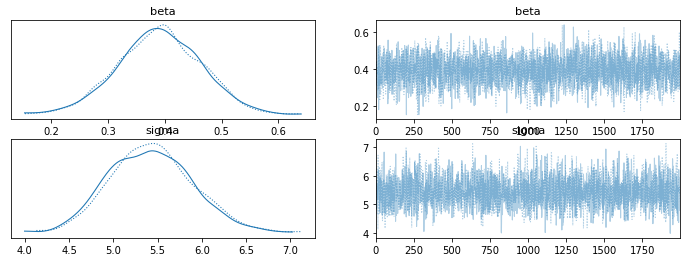

In [9]:
pm.traceplot(trace)

In [10]:
print(pm.summary(trace).round(2))

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta   0.39  0.07    0.25     0.53       0.00     0.00    3094.0    2345.0   
sigma  5.43  0.48    4.54     6.30       0.01     0.01    3239.0    2739.0   

       r_hat  
beta     1.0  
sigma    1.0  


In [23]:
x2d

array([[-13.23970326],
       [-15.88331376],
       [-33.16163858],
       [-21.55549931],
       [  9.64275421],
       [-25.34123105],
       [-33.99358942],
       [-33.10907465],
       [ -8.43108627],
       [-27.7723805 ]])

No handles with labels found to put in legend.


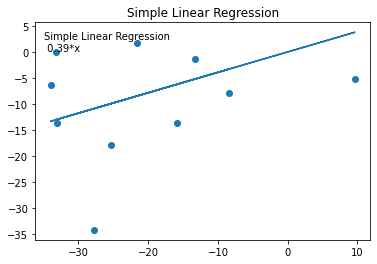

In [25]:
lm = LinearRegression(fit_intercept=False)
if isinstance(x, pd.Series):
  x = x.to_numpy().reshape(-1,1)
  y = y.to_numpy().reshape(-1,1)

ypred =  lm.fit(x,y).predict(x)
plt.scatter(x,y)
plt.plot(x,ypred)
legend_title = 'Simple Linear Regression\n {}*x'.format(round(lm.coef_[0][0],2))
legend = plt.legend(loc='upper left', frameon=False, title=legend_title)
plt.title("Simple Linear Regression")
plt.show()